# <center> Graficas de las soluciones </center>
## Del primer y segundo ejercicio del segundo examen parcial de Ecuaciones Diferenciales Parciales

Empecemos viendo el problema 2 (Ejercicio 1)

### Resuelva el problema

$$\frac{\partial u}{\partial t}=\frac{\partial ^{2} u}{\partial x^2},$$
$$u(0, t) = u(1, t) = 0, t > 0$$
$$u(x, 0) = 2x + 1, 0 < x < 1$$

Veamos la condición

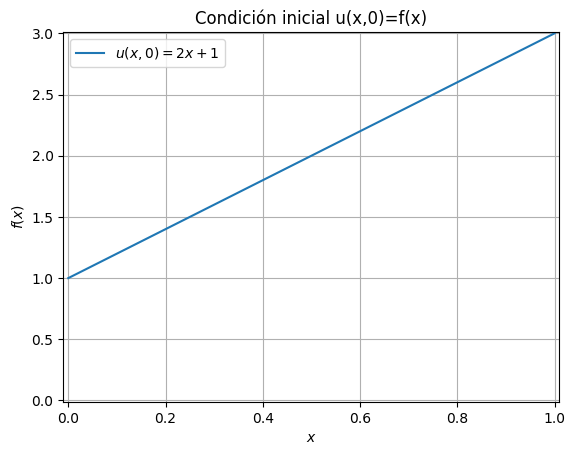

In [11]:
import matplotlib.pyplot as plt
import math
import numpy as np
from pylab import *

def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = 2*x[i]+1
    return y

x = np.linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,0)=2x+1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial u(x,0)=f(x)")
xlim([-0.01,1.01]),ylim([-0.01,3.01]),grid(),legend()
show()


Usamos una serie de Fourier para aproximar la condición inicial
$u(x,0)=2x+1$


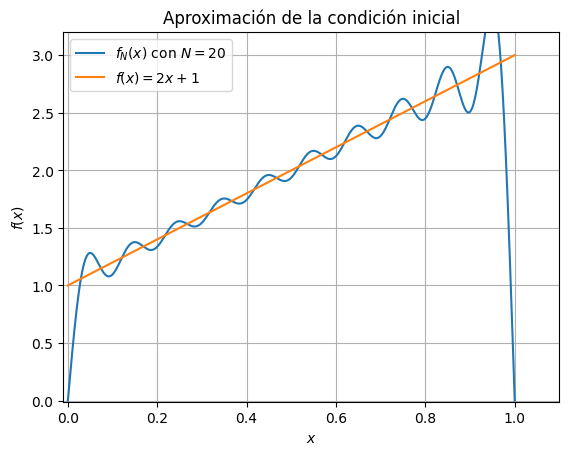

In [21]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (1-3*(-1)**n)*sin(n*pi*x)/(n)
    return (2.0/pi)*f
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=2x+1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,3.2]),grid(),legend()
show()

In [ ]:
Podemos visualizar la aproximación para diferentes cantidades de armónicos.

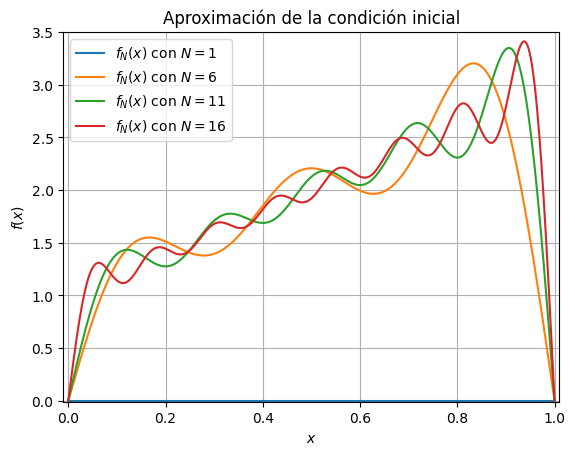

In [19]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,3.5]),grid(),legend()
show()

La solucion a este problema es la siguiente
$$u(x,t)=\sum_{n=1}^{\infty}\left[ 1-3(-1)^n\right]\left(\frac{2}{n\pi}\right) sin(n\pi x) e^{-(n\pi)^2 t}$$

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, 
$t=0$

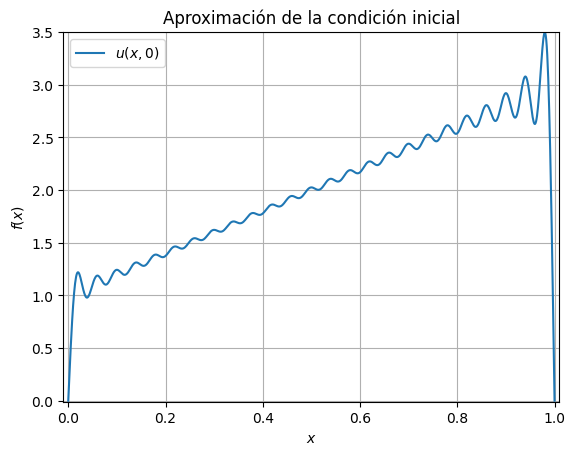

In [20]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (1-3*(-1)**n)*sin(n*pi*x)/(n)
    return (2.0/pi)*f

x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,3.5]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando 
$t \rightarrow \infty$ 

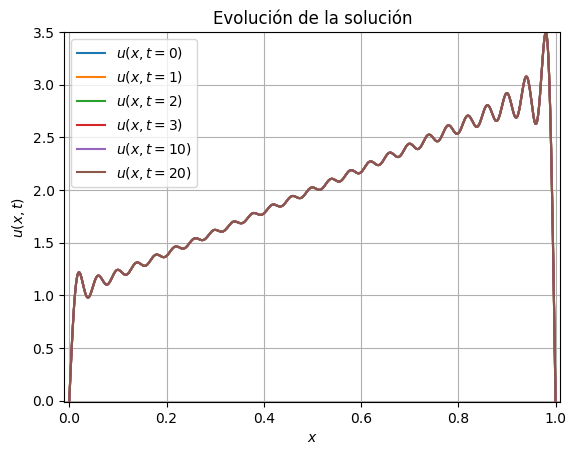

In [26]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,3.5]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

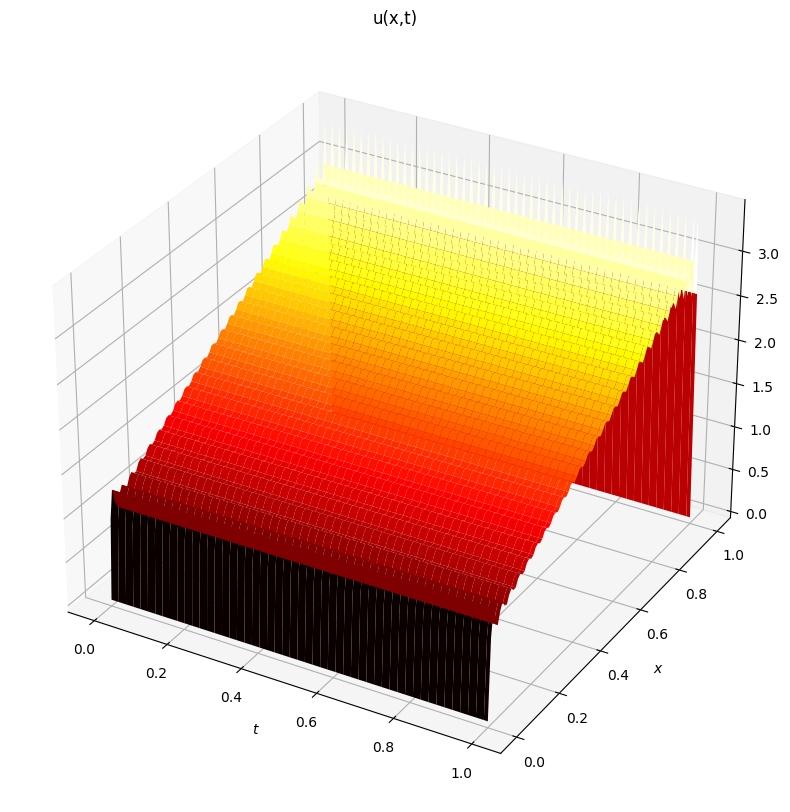

In [33]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="hot"); 